##Summary

One of the most common investment strategies used nowadays appears to be stock market trades. In this work, price prediction and trading on stock market transactions are done using systems that use an algorithm that has been reinforcement learning trained.

These stock market transactions show a time series issue that was created utilizing the day's end closing data. The closing data will be the main focus of this research, which compares the outcomes of prediction models on time series and examines some outcomes through purchasing and selling. Social and economic aspects that could affect these price models will be left out of the analysis process.

The second section will involve the creation of an agent and the measurement of success in accordance with various scenarios through the execution of buy, sell, and hold transactions on the time series. Moving averages and other indicators will be used to provide the required buy and sell signals for trading. In the section that follows, titled "Conclusion," the outcomes of these processes will be discussed.

##Motivation
Creating the best forecasting model for stock market transactions is very impossible. This is because the system's variables have an impact on trade values when using blunt data. The data we have, however, can be used to create models that will allow us to get good results in this system.

The requirement to create a beautiful algorithm using a limited dataset is the aspect of this project that most interested me. Years of battling the causality of my stock market purchasing and selling decisions prompted me to finally ask, "I wonder what would happen if an analytical approach were used to these transactions?" I began looking for the response to the query.

I had the possibility to experiment different dynamics and reinforcement learning while working on this project. He provided me the opportunity;

I want to thank my instructors Tuna Akar, Cem Yiman, and Alperen Sayer as well as the Coşkunöz Education Foundation and Bursa Eskişehir Bilecik Development Agency.

##Literature Review

In Diler's (2003) study, an artificial neural network model was employed to try and anticipate the direction of the BIST 100 index returns one day in advance. In the study, it had a 60.81% accuracy rate in predicting the price direction.

In their study from 2004, Tektaş and Karataş used artificial neural networks to estimate the stock prices of companies engaged in the food and cement industries. The correlation coefficient served as the measurement of prediction accuracy in their studies. The performance of artificial neural networks was shown to be superior than the regression approach at the conclusion of the investigation.

In their study, Karaatl et al. (2005) attempted to forecast the BIST index's closing price. Regression and artificial neural networks were used to estimate data, and it was shown that artificial neural networks produced superior outcomes to regression. Interest rates, the price of gold, the rate of inflation, the index of industrial production, the interest rate on savings deposits, and the dollar rate were used as inputs, and monthly forecasts were made. As a performance indicator, RMSE (Root Mean Squared Error) was utilized.

In their study, Yıldız et al. (2008). employed artificial neural networks to forecast the direction of the BIST 100 index the following day. Inputs included variables like the highest and lowest price, closing price, and TL-Dollar rate. The index direction a day later is the output variable. 100 observations were utilized to compare the performance of the model, whereas 1805 observations were used to train the neural network. In their studies, they had a prediction accuracy of 54.37%.

In their study, Öz et al. (2011) forecasted the returns of the stocks included in the BIST 30 index in their analysis. With the aid of discriminant analysis, stock returns were approximated using financial ratios from one and two years prior. The analysis's findings showed that the model employing the ratios from two years ago had a greater success rate.

In the study written up by Kara et al. (2011), they used support vector machines and artificial neural networks to estimate the BIST100 index. There are ten technical indicators used. The scale for the data set is [-1.0, 1.0]. They found that support vector machines could predict accurately 71.52% of the time, compared to artificial neural networks' average prediction accuracy of 75.74%.

#Dataset & Preparation

In [4]:
#!pip install yfinance --upgrade --no-cache-dir
#!pip install pmdarima
#!pip3 install statsmodels

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
import pkg_resources
import types
import time
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import ADFTest,auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()


Akfen = pdr.get_data_yahoo("AKFGY.IS", start='2018-12-01', end='2022-12-13')
Sekerbank = pdr.get_data_yahoo("SKBNK.IS", start='2018-12-01', end='2022-12-13')
Eregli = pdr.get_data_yahoo("EREGL.IS", start='2018-12-01', end='2022-12-13')
Sise = pdr.get_data_yahoo("SISE.IS", start='2018-12-01', end='2022-12-13')
KozaAltin = pdr.get_data_yahoo("KOZAA.IS", start='2018-12-01', end='2022-12-13')
Vestel = pdr.get_data_yahoo("VESTL.IS", start='2018-12-01', end='2022-12-13')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
Akfen_close=Akfen["Close"]
Sekerbank_close=Sekerbank["Close"]
Eregli_close=Eregli["Close"]
Sise_close=Sise["Close"]
KozaAltin_close=KozaAltin["Close"]
Vestel_close=Vestel["Close"]

Akfen_close = Akfen_close.reset_index(name='Akfen')
Sekerbank_close = Sekerbank_close.reset_index(name='Sekerbank')
Eregli_close = Eregli_close.reset_index(name='Eregli')
Sise_close = Sise_close.reset_index(name='Sise')
KozaAltin_close = KozaAltin_close.reset_index(name='KozaAltin')
Vestel_close = Vestel_close.reset_index(name='Vestel')

Hisseler=pd.concat([Akfen_close["Akfen"], Sekerbank_close["Sekerbank"],Eregli_close["Eregli"],
           Sise_close["Sise"],KozaAltin_close["KozaAltin"],Vestel_close["Vestel"]], axis=1)
Hisseler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Akfen      1021 non-null   float64
 1   Sekerbank  1021 non-null   float64
 2   Eregli     1021 non-null   float64
 3   Sise       1021 non-null   float64
 4   KozaAltin  1021 non-null   float64
 5   Vestel     1021 non-null   float64
dtypes: float64(6)
memory usage: 48.0 KB


#Exploratory Data Analysis of the Preprocessed Dataset

In [6]:
Son_1_Hafta=Hisseler.iloc[len(Hisseler)-7:len(Hisseler)]
Son_1_Yil=Hisseler.iloc[len(Hisseler)-365:len(Hisseler)]
Degisim_1_Hafta=Son_1_Hafta.pct_change()
Degisim_1_Yil=Son_1_Yil.pct_change()
Degisim_ortalaması_1Hafta=Degisim_1_Hafta.mean(axis=0)
Degisim_ortalaması_1Yil=Degisim_1_Yil.mean(axis=0)
print(Degisim_ortalaması_1Hafta*100)
print(Degisim_ortalaması_1Yil*100)

Akfen       -0.084442
Sekerbank    0.968864
Eregli       0.036343
Sise         0.581965
KozaAltin    2.184173
Vestel       0.287379
dtype: float64
Akfen        0.378143
Sekerbank    0.327499
Eregli       0.265593
Sise         0.486839
KozaAltin    0.428251
Vestel       0.248880
dtype: float64


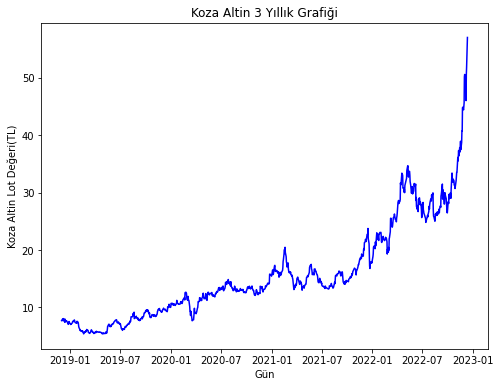

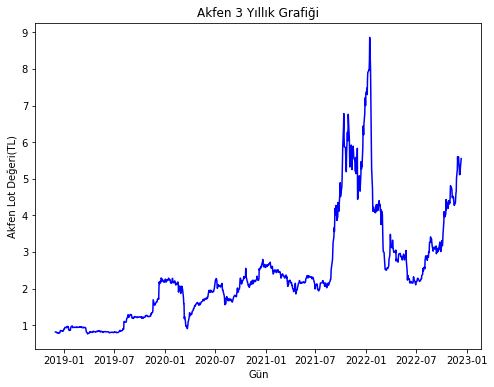

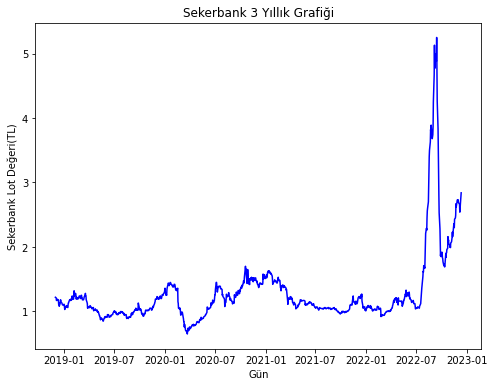

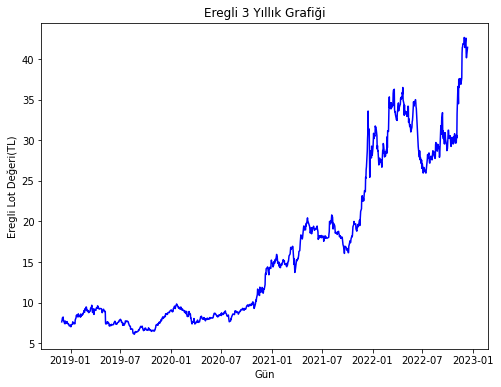

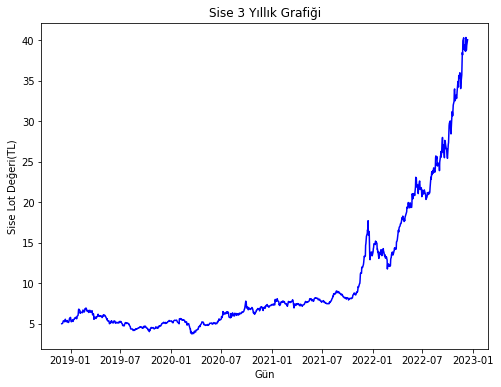

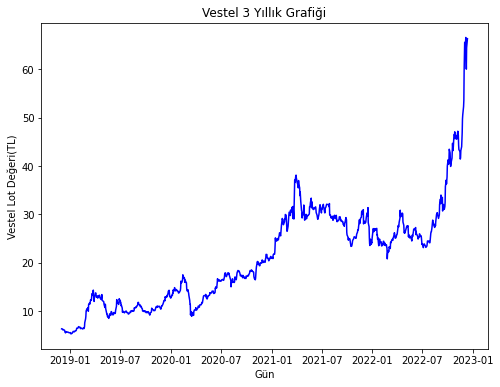

In [7]:
fig, Koza_fig = plt.subplots(figsize=(8, 6))
plt.ylabel('Koza Altin Lot Değeri(TL)')
plt.xlabel('Gün')
plt.title("Koza Altin 3 Yıllık Grafiği")
fig, Akfen_fig = plt.subplots(figsize=(8, 6))
plt.ylabel('Akfen Lot Değeri(TL)')
plt.xlabel('Gün')
plt.title("Akfen 3 Yıllık Grafiği")
fig, Sekerbank_fig = plt.subplots(figsize=(8, 6))
plt.ylabel('Sekerbank Lot Değeri(TL)')
plt.xlabel('Gün')
plt.title("Sekerbank 3 Yıllık Grafiği")
fig, Eregli_fig = plt.subplots(figsize=(8, 6))
plt.ylabel('Eregli Lot Değeri(TL)')
plt.xlabel('Gün')
plt.title("Eregli 3 Yıllık Grafiği")
fig, Sise_fig = plt.subplots(figsize=(8, 6))
plt.ylabel('Sise Lot Değeri(TL)')
plt.xlabel('Gün')
plt.title("Sise 3 Yıllık Grafiği")
fig, Vestel_fig = plt.subplots(figsize=(8, 6))
plt.ylabel('Vestel Lot Değeri(TL)')
plt.xlabel('Gün')
plt.title("Vestel 3 Yıllık Grafiği")
Koza_fig.plot(KozaAltin["Close"],color="blue")
Akfen_fig.plot(Akfen["Close"],color="blue")
Sekerbank_fig.plot(Sekerbank["Close"],color="blue")
Eregli_fig.plot(Eregli["Close"],color="blue")
Sise_fig.plot(Sise["Close"],color="blue")
Vestel_fig.plot(Vestel["Close"],color="blue")
plt.show()

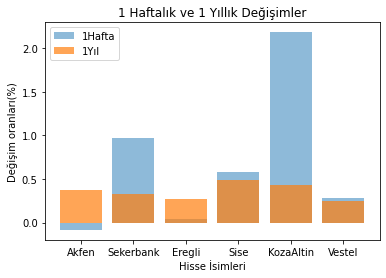

In [8]:
y_pos =["Akfen","Sekerbank","Eregli","Sise","KozaAltin","Vestel"]
# Create bars
plt.title("1 Haftalık ve 1 Yıllık Değişimler")
plt.ylabel('Değişim oranları(%)')
plt.xlabel('Hisse İsimleri')
plt.bar(y_pos,Degisim_ortalaması_1Hafta*100,label="1Hafta",alpha=0.5)
plt.bar(y_pos,Degisim_ortalaması_1Yil*100,label="1Yıl",alpha=0.7)
plt.legend()
plt.show()

#Model Development

##Using ARIMA to Predict on Stock Market

In [9]:
Hisse=KozaAltin["Close"]
df1 = pd.DataFrame(data=Hisse.index, columns=['Date'])
df2 = pd.DataFrame(data=Hisse.values, columns=['Value'])
df = pd.merge(df1, df2, left_index=True, right_index=True)
train = Hisse[Hisse.index < pd.to_datetime("2021-11-01", format='%Y-%m-%d')]
df1_train = pd.DataFrame(data=train.index, columns=['Date'])
df2_train = pd.DataFrame(data=train.values, columns=['Value'])
df_train = pd.merge(df1_train, df2_train, left_index=True, right_index=True)
test = Hisse[Hisse.index > pd.to_datetime("2021-11-01", format='%Y-%m-%d')]
df1_test = pd.DataFrame(data=test.index, columns=['Date'])
df2_test = pd.DataFrame(data=test.values, columns=['Value'])
df_test = pd.merge(df1_test, df2_test, left_index=True, right_index=True)


In [10]:
arima_model = auto_arima(df_train["Value"],start_p = 2 ,d =2,start_q=2,max_p=5,max_q=5,n_fits=100)
arima_model

ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

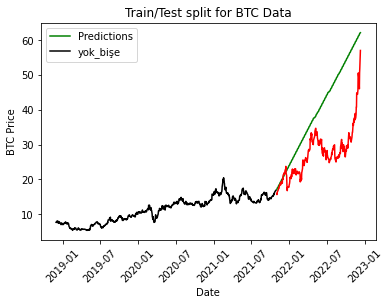

In [11]:
y = df_train['Value']
ARMAmodel = SARIMAX(y,order = (5, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.plot(train, color = "black",label="Train data")
plt.plot(test, color = "red", label="Test data")
plt.ylabel('Koza Altin Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Koza Altin")
plt.legend()
plt.show()

In [12]:
A=y_pred_out.to_frame()
B = A.reset_index(drop=True)
df_new=pd.concat([df_test, B], axis=1)
r2_score(df_new["Value"],df_new["Predictions"])

-3.604755202101951

##Using Reinforcement Learning to Buy or Sell on Stock Market

###Making Indicator for buy or sell signals

In [13]:
Endexler=Degisim_ortalaması_1Yil.index
Güvenli_liman=[]
Güvensiz_liman=[]
A=Degisim_ortalaması_1Yil.mean()
for i in range(6):
  if Degisim_ortalaması_1Yil[i]<=A:
    Güvensiz_liman.append(Endexler[i])
  else:
    Güvenli_liman.append(Endexler[i])

Güvenli_liman2=[]
Güvensiz_liman2=[]
A=Degisim_ortalaması_1Hafta.mean()
for i in range(6):
  if Degisim_ortalaması_1Hafta[i]<=A:
    Güvensiz_liman2.append(Endexler[i])
  else:
    Güvenli_liman2.append(Endexler[i])

Trend_Hisse = set(Güvenli_liman) & set(Güvenli_liman2)
print(Trend_Hisse)

{'KozaAltin'}


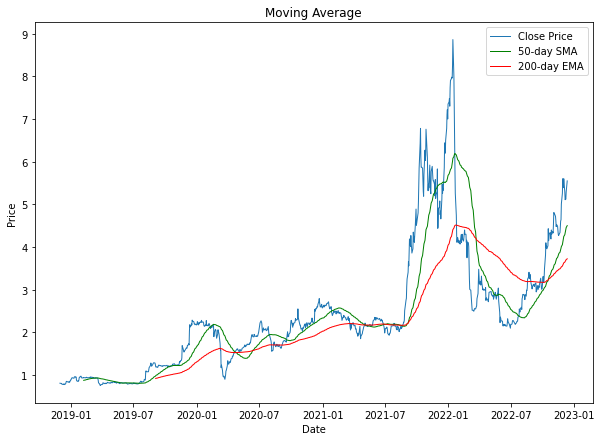

In [14]:
# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

# Retrieve the Goolge stock data from Yahoo finance
data = Akfen
close = data['Close']

# Compute the 50-day SMA
n = 50
SMA = SMA(data,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

# Compute the 200-day EWMA
ew = 200
EWMA = EWMA(data,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

# Plotting the Google stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(data['Close'],lw=1, label='Close Price')
plt.plot(SMA,'g',lw=1, label='50-day SMA')
plt.plot(EWMA,'r', lw=1, label='200-day EMA')

# Add a legend to the axis
plt.legend()

plt.show()

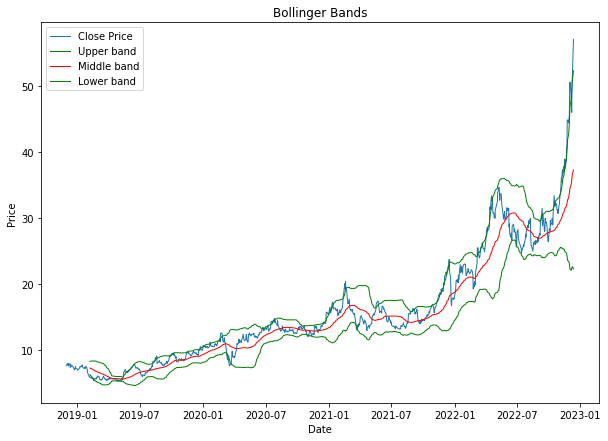

In [15]:
# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 
# Retrieve the Goolge stock data from Yahoo finance
data = KozaAltin

# Compute the Bollinger Bands for Google using the 50-day Moving average
n = 50
BBANDS = BBANDS(data, n)

# Create the plot
# pd.concat([BBANDS.Close, BBANDS.UpperBB, BBANDS.LowerBB],axis=1).plot(figsize=(9,5),)

plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(BBANDS.Close,lw=1, label='Close Price')
plt.plot(data['UpperBand'],'g',lw=1, label='Upper band')
plt.plot(data['MiddleBand'],'r',lw=1, label='Middle band')
plt.plot(data['LowerBand'],'g', lw=1, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()

[*********************100%***********************]  1 of 1 completed


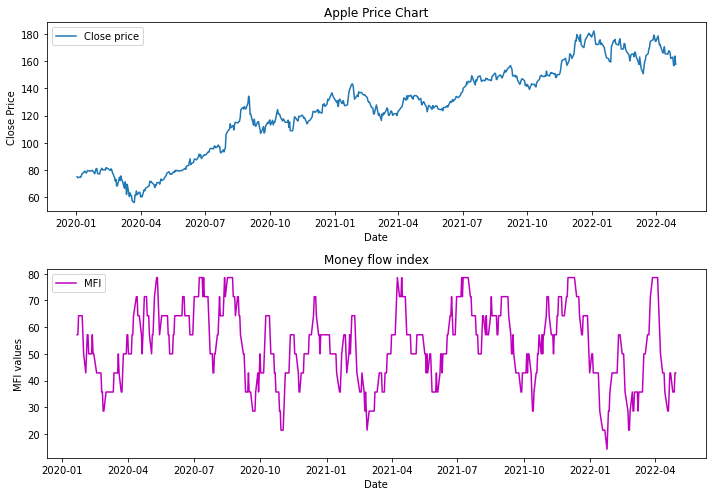

In [16]:
# Calculate money flow index
def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close) / 3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(lambda x: (x > 0).sum(), raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(lambda x: (x < 0).sum(), raw=True)
    return 100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))

# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2022-04-30")

data['MFI'] = mfi(data['High'], data['Low'], data['Close'], data['Volume'], 14)

# Plotting the Price Series chart and the MFI below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('Apple Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Money flow index')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(data['MFI'], 'm', label='MFI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
df= Vestel.copy()
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1

### Reinforcement İle Analiz

In [46]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 50000,
    max_sell = 50000,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 263: cannot sell anything, inventory 0
day 264: cannot sell anything, inventory 0
day 265: cannot sell anything, inventory 0
day 267: cannot sell anything, inventory 0
day 270: cannot sell anything, inventory 0
day 271: cannot sell anything, inventory 0
day 273: cannot sell anything, inventory 0
day 274: cannot sell anything, inventory 0
day 275: cannot sell anything, inventory 0
day 277: cannot sell anything, inventory 0
day 287: cannot sell anything, inventory 0
day 290: cannot sell anything, inventory 0
day 307: cannot sell anything, inventory 0
day 310: cannot sell anything, inventory 0
day 311: cannot sell anything, inventory 0
day 312: cannot sell anything, inventory 0
day 332: buy 1088 units at price 9998.719543, total balance 1.280457
day 334: total balances 1.280457, not enough money to buy a unit price 8.910000
day 415, sell 1088 units at price 19224.960083, investment 98.316503 %, total balance 19226.240540,
day 416: cannot sell anything, inventory 0
day 445: cannot sell

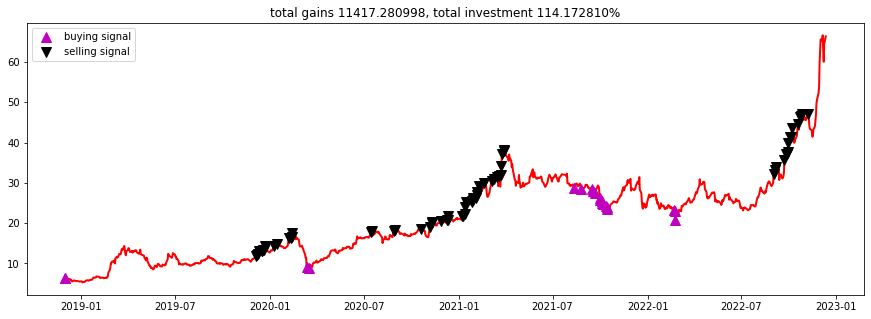

In [47]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()


#İndikatörlerle Uygulamalar

[0.024320754681997014, 0.01158135382875114, -0.004632574665893174, -0.038218313007713056, 0.04748340711551158, -0.018530132991609216, -0.030111376372384813, -0.026637014402949633, 0.06253906768971007, -0.04400898992208868, 0.01273945607723359, 0.0, -0.009265038883810695, -0.006948779162858076, -0.015055715798186209, -0.040534572728665896, 0.001158102248482562, 0.037060210759230605, 0.01853007776762139, -0.030111376372384813, 0.008106936635328243, 0.0, -0.022004494961044396, 0.009265038883810695, -0.00115810224848234, 0.019688235240091667, 0.006948779162857965, 0.026637014402949744, -0.005790676914375625, 0.011581298604763424, -0.003474361969435069, 0.02895327412390236, -0.009265094107798522, -0.02895327412390236, -0.012739400853245875, -0.010423196356280973, -0.011581298604763424, -0.008106881411340527, -0.009265094107798522, 0.039376470480183334, -0.01505571579818632, -0.008106881411340416, -0.02895327412390236, -0.04864150936399414, -0.02547891215446718, -0.03706015553524278, -0.0220

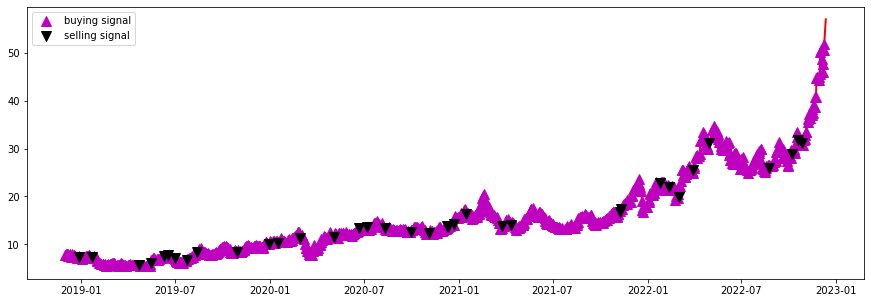

In [23]:
import numpy as np
import pandas as pd

# Load the stock data
data = KozaAltin

# Normalize the data
data = (data - data.mean()) / data.std()

# Split the data into training and test sets
train_data = data[:len(data)]


# Define the learning rate
learning_rate = 0.1

# Define the discount factor
discount_factor = 0.95

# Define the exploration rate
exploration_rate = 0.1

# Define the number of actions
num_actions = 3

# Define the Q-table
q_table = np.zeros((len(train_data), num_actions))

# Define the rewards
rewards = []

# Define lists to store the buying and selling points
buying_points = []
selling_points = []

# Train the agent
for i in range(len(train_data)-1):
    # Choose an action using the exploration rate
    if np.random.uniform() < exploration_rate:
        action = np.random.randint(num_actions)
    else:
        action = np.argmax(q_table[i])
        
    # Take the action and observe the reward
    if action == 0:
        # Buy
        reward = train_data.iloc[i+1]['Close'] - train_data.iloc[i]['Close']
        buying_points.append(i)
    elif action == 1:
        # Sell
        reward = train_data.iloc[i]['Close'] - train_data.iloc[i+1]['Close']
        selling_points.append(i)
    else:
        # Hold
        reward = 0
        
    # Update the Q-table
    q_table[i+1] = q_table[i] + learning_rate * (reward + discount_factor * np.max(q_table[i+1]) - q_table[i])
    
    # Add the reward to the list of rewards
    rewards.append(reward)
    

# Print the final rewards
print(rewards)

close = KozaAltin['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = buying_points)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = selling_points)
plt.legend()
plt.show()

[0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412390236, -0.02895327412

<function matplotlib.pyplot.legend(*args, **kwargs)>

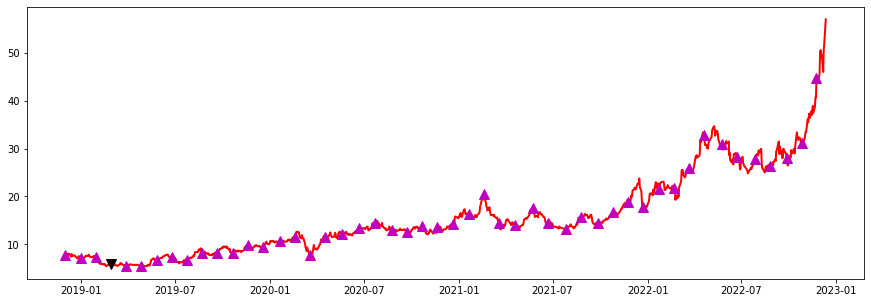

In [24]:
import numpy as np
import pandas as pd

# Load the stock data
data = KozaAltin

# Normalize the data
data = (data - data.mean()) / data.std()

# Split the data into training and test sets
train_data = data[:len(data)]

# Define the learning rate
learning_rate = 0.1

# Define the discount factor
discount_factor = 0.95

# Define the exploration rate
exploration_rate = 0.1

# Define the number of actions
num_actions = 3

# Define the Q-table
q_table = np.zeros((len(train_data), num_actions))

# Define the rewards
rewards = []

# Define lists to store the buying and selling points
buying_points = []
selling_points = []

# Define the cooldown period (in days)
cooldown_period = 20

# Initialize the cooldown counter
cooldown_counter = 0

# Train the agent
for i in range(len(train_data)-1):
    # Check if the agent is on cooldown
    if cooldown_counter > 0:
        # Decrement the cooldown counter
        cooldown_counter -= 1
    else:
        # Choose an action using the exploration rate
        if np.random.uniform() < exploration_rate:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(q_table[i])
        
        # Take the action and observe the reward
        if action == 0:
            # Buy
            reward = train_data.iloc[i+1]['Close'] - train_data.iloc[i]['Close']
            buying_points.append(i)
            # Set the cooldown counter
            cooldown_counter = cooldown_period
        elif action == 1:
            # Sell
            reward = train_data.iloc[i]['Close'] - train_data.iloc[i+1]['Close']
            selling_points.append(i)
            # Set the cooldown counter
            cooldown_counter = cooldown_period
        else:
            # Hold
            reward = 0
        
    # Update the Q-table
    q_table[i+1] = q_table[i] + learning_rate * (reward + discount_factor * np.max(q_table[i+1]) - q_table[i])
    
    # Add the reward to the list of rewards
    rewards.append(reward)
    

# Print the final rewards
print(rewards)

close = KozaAltin['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = buying_points)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = selling_points)
plt.legend

[0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, 0.024320754681997014, -0.030111376372384813, -0.030111376372384813, -0.030111376372384813, -0.030111376372384813, -0.030111376372384813, -0.030111376372384813, -0.009265038883810695, -0.009265038883810695, -0.009265038883810695, -0.009265038883810695, -0.009265038883810695, -0.009265038883810695, 0.01853007776762139, 0.01853007776762139, 0.01853007776762139, 0.01853007776762139, 0.01853007776762139, 0.01853007776762139, -0.00115810224848234, -0.00115810224848234, -0.00115810224848234, -0.00115810224848234, -0.00115810224848234, -0.00115810224848234, -0.003474361969435069, -0.003474361969435069, -0.003474361969435069, -0.003474361969435069, -0.003474361969435069, -0.003474361969435069, 0.011581298604763424, 0.011581298604763424, 0.011581298604763424, 0.011581298604763424, 0.011581298604763424, 0.011581298604763424, -0.02895327412390236, -0.02895327412390236, -0.0289532741239023

<function matplotlib.pyplot.legend(*args, **kwargs)>

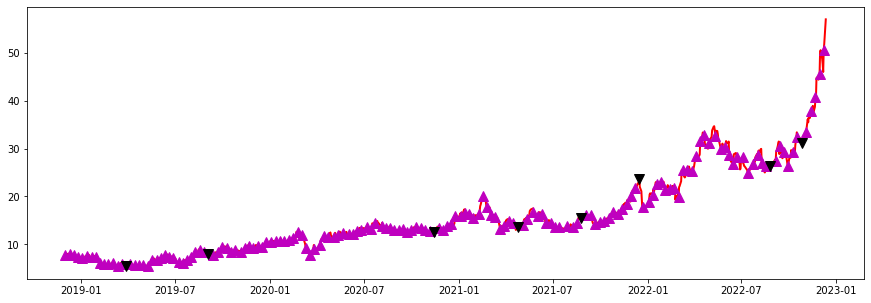

In [25]:
import numpy as np
import pandas as pd

# Load the stock data
data = KozaAltin

# Normalize the data
data = (data - data.mean()) / data.std()

# Split the data into training and test sets
train_data = data[:len(data)]

# Define the learning rate
learning_rate = 0.1

# Define the discount factor
discount_factor = 0.95

# Define the exploration rate
exploration_rate = 0.1

# Define the number of actions
num_actions = 3

# Define the Q-table
q_table = np.zeros((len(train_data), num_actions))

# Define the rewards
rewards = []

# Define lists to store the buying and selling points
buying_points = []
selling_points = []

# Define the cooldown period (in days)
cooldown_period = 5

# Initialize the cooldown counter
cooldown_counter = 0

# Define the starting amount of money
starting_money = 1000

# Initialize the current amount of money
money = starting_money

# Train the agent
for i in range(len(train_data)-1):
    # Check if the agent is on cooldown
    if cooldown_counter > 0:
        # Decrement the cooldown counter
        cooldown_counter -= 1
    else:
        # Choose an action using the exploration rate
        if np.random.uniform() < exploration_rate:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(q_table[i])
        
        # Take the action and observe the reward
        if action == 0:
            # Buy
            reward = train_data.iloc[i+1]['Close'] - train_data.iloc[i]['Close']
            buying_points.append(i)
            # Set the cooldown counter
            cooldown_counter = cooldown_period
            # Update the amount of money
            money -= train_data.iloc[i]['Close']
        elif action == 1:
            # Sell
            reward = train_data.iloc[i]['Close'] - train_data.iloc[i+1]['Close']
            selling_points.append(i)
            # Set the cooldown counter
            cooldown_counter = cooldown_period
            # Update the amount of money
            money += train_data.iloc[i]['Close']
        else:
            # Hold
            reward = 0
        
    # Update the Q-table
    q_table[i+1] = q_table[i] + learning_rate * (reward + discount_factor * np.max(q_table[i+1]) - q_table[i])
    
    # Add the reward to the list of rewards
    rewards.append(reward)
    

# Print the final rewards
print(rewards)

# Print the final amount of money
print("Final amount of money:", money)

close = KozaAltin['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = buying_points)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = selling_points)
plt.legend

[*********************100%***********************]  1 of 1 completed
Buy signal at index 49
Buy signal at index 50
Buy signal at index 51
Buy signal at index 52
Buy signal at index 53
Buy signal at index 54
Buy signal at index 55
Sell signal at index 130
Sell signal at index 131
Sell signal at index 137
Sell signal at index 138
Sell signal at index 139
Sell signal at index 163
Sell signal at index 164
Sell signal at index 165
Sell signal at index 166
Sell signal at index 168
Sell signal at index 169
Sell signal at index 213
Sell signal at index 214
Sell signal at index 215
Sell signal at index 216
Sell signal at index 220


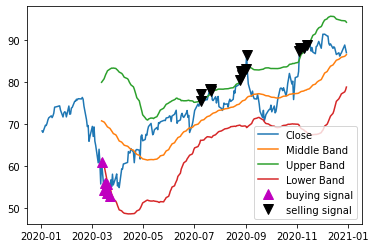

In [26]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def BBANDS(data, window):
    # Compute the Bollinger Bands 
    MA = data.Close.rolling(window=window).mean()
    SD = data.Close.rolling(window=window).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data

# Retrieve the stock data from Yahoo finance
data = yf.download("GOOG", start="2020-01-01", end="2020-12-31")

# Define the window size for the Bollinger Bands
n = 50

# Compute the Bollinger Bands for the stock using the 50-day Moving average
BBANDS = BBANDS(data, n)


buy_signal=[]
sell_signal=[]
# Look for buy and sell signals using the Bollinger Bands
for i in range(len(data)):
    # If the stock price touches or moves outside the upper band, this can be a sell signal
    if data['Close'][i] >= BBANDS['UpperBand'][i]:
        sell_signal.append(i)
        print("Sell signal at index", i)
    # If the stock price touches or moves outside the lower band, this can be a buy signal
    elif data['Close'][i] <= BBANDS['LowerBand'][i]:
        print("Buy signal at index", i)
        buy_signal.append(i)

# Plot the stock data and Bollinger Bands
plt.plot(data['Close'], label='Close')
plt.plot(BBANDS['MiddleBand'], label='Middle Band')
plt.plot(BBANDS['UpperBand'], label='Upper Band')
plt.plot(BBANDS['LowerBand'], label='Lower Band')
plt.plot(data['Close'], '^', markersize=10, color='m', label = 'buying signal', markevery = buy_signal)
plt.plot(data['Close'], 'v', markersize=10, color='k', label = 'selling signal', markevery = sell_signal)
plt.legend()
plt.show()

#Result and Discussion

Data structures are consequently introduced and displayed on the graph. These time series data structures were used for future ARIMA predictions, and the resulting R2 score was noted. As a result of the failure of the forecasts made in this section, new models were emphasized. These new models use the reinforcement learning technique to purchase and sell on the provided graph. Trades were executed in accordance with the defined inductor structures that will provide trading signals to these models. The following are the results for the trades executed by the agents linked to these models:

Akfen= %119,2087

Sekerbank = %109,3764

Ereğli = %90,087

Şişe Cam = %51,4276

Koza Altın = %130,61

Vestel = %114,17

an increase was observed. However, if we consider the min and max values of these shares in certain periods;

Akfen = from 0,7576 to 8,86

Şekerbank = from 0,65 to 5,25

Ereğli = from 6,14 to 42,66

Şişe Cam = from 3,71 to 40,36

Koza Altın = from 5,37 to 57,05

Vestel = from 5,26 to 66,6 was observed.

The study was successful based on these findings, but it's possible that this is a function of the fact that it was conducted at a time when the stock market was rising. Different stocks must be trained in models that are bearish, stable, and bullish for the long, short, and medium terms in order to accurately calculate the success rate.

#Future Works

The creation of a new agent is the most significant task that can be accomplished for this project in the future. In order to make an appropriate transaction, this agent will examine both the depth data and the end-of-day closing data. The freshly generated agent's evolutionary approach may be its learning strategy. You could also choose to believe rumors. In an NLP project, a distinct feature with the articles written on the shares on particular websites can be added to produce an acceptable algorithm (tradingview, twitter ..).

#References


*   Nesrin Koç Ustalı, Nedret Tosun, Ömür Tosun.(2020).Makine Öğrenmesi Teknikleri ile Hisse Senedi Fiyat Tahmini
*   Mehmet ÖZÇALICI, Yücel AYRIÇAY.(2016).BİLGİ İŞLEMSEL ZEKA YÖNTEMLERİ İLE HİSSE SENEDİ FİYAT TAHMİNİ: BİST UYGULAMASI 
*   Tamerlan Mashadihasanli.(2022).Stock Market Price Forecasting Using the Arima Model: an Application to Istanbul, Turkiye
*   Stock-Prediction-Models.(2021) .github.com :github.com/huseinzol05/Stock-Prediction-Models
*   Rohan Kumar.(2021).Python for stock analysis. 
medium.com/analytics-vidhya/python-for-stock-analysis-fcff252ca559
*   Shadap Hussein.Modelling and Evaluation - Time Series Forecasting using PyCaret. developers.refinitiv.com/en/article-catalog/article/modelling-and-evaluation-using-pycaret-on-time-series-data
*   Chainika Thakar, Danish Khajuria.(2022). Building Technical Indicators in Python. blog.quantinsti.com/build-technical-indicators-in-python/
*   Rohan Kumar.(2021). How to Build Stock Technical Indicators with Python. medium.com/analytics-vidhya/how-to-build-stock-technical-indicators-with-python-7a0c5b665285






